# Heart Attack 
* age - Age of the patient

* sex - Sex of the patient

* cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

* trtbps - Resting blood pressure (in mm Hg)

* chol - Cholestoral in mg/dl fetched via BMI sensor

* fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

* restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

* thalachh - Maximum heart rate achieved

* oldpeak - Previous peak

* slp - Slope

* caa - Number of major vessels

* thall - Thalium Stress Test result ~ (0,3)

* exng - Exercise induced angina ~ 1 = Yes, 0 = No

* output - Target variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


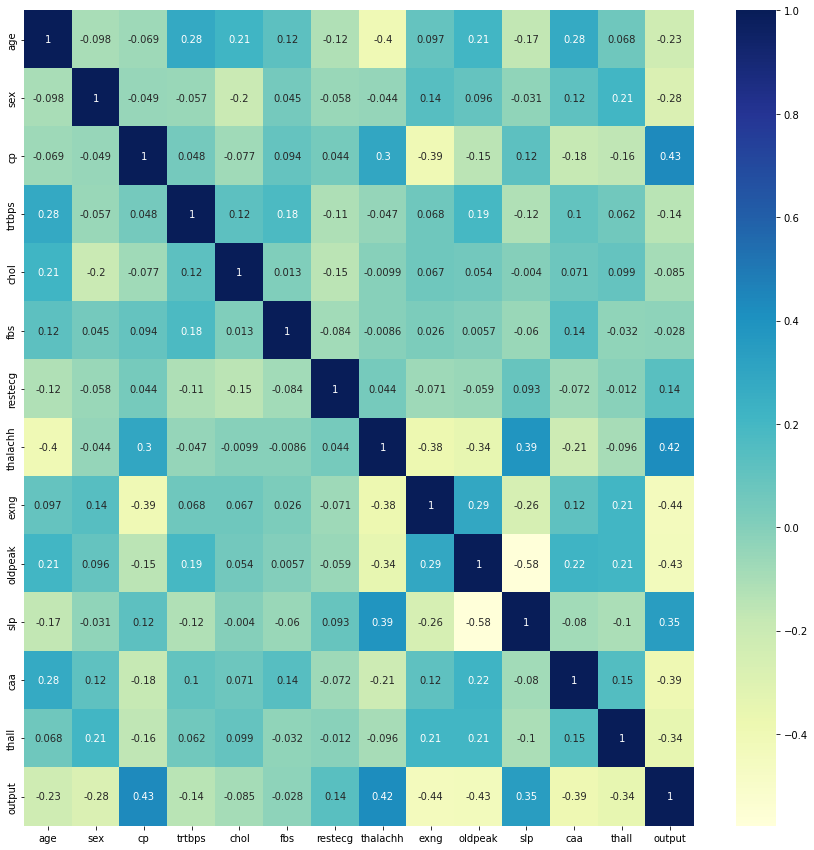

In [9]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, roc_curve, mean_squared_error, confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


In [33]:
X = df.drop(["output"], axis=1)
y = df["output"]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = LR.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8524590163934426

 Confusion Matrix 
 [[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [48]:
DT = DecisionTreeClassifier(random_state = 42)

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7540983606557377

 Confusion Matrix 
 [[25  4]
 [11 21]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [47]:
RF = RandomForestClassifier(random_state = 42)

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The test accuracy score of Decision Tree is  0.8360655737704918

 Confusion Matrix 
 [[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [46]:
GB = GradientBoostingClassifier(random_state = 42)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7704918032786885

 Confusion Matrix 
 [[23  6]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [45]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The test accuracy score of Decision Tree is  0.6885245901639344

 Confusion Matrix 
 [[18 11]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [37]:
svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for type in kernel_type:
    svc_classifier = SVC(kernel = type)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))


<BarContainer object of 4 artists>

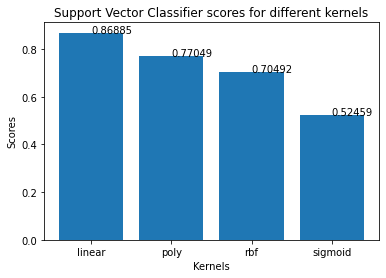

In [38]:
for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.bar(kernel_type, svc_scores)

In [41]:
svc =  SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(svc_conf_matrix)
print(classification_report(y_test, svc_predicted))
print("\n")
print("Accuracy of Support Vector Classifier: {:.3f}".format(svc_acc_score*100),'%\n')

confussion matrix
[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Accuracy of Support Vector Classifier: 86.885 %

